In [1]:
import os
import glob

import numpy as np

import monai
from monai.transforms import LoadImage

import itk
from itk import TubeTK as tube

import site
site.addsitedir("../ARGUS")

from ARGUS_IO import *
from ARGUS_ptx_ar_train import ARGUS_ptx_ar_train
from ARGUS_ptx_roi_inference import ARGUS_ptx_roi_inference

In [2]:
device_num = 0
best_models = [9, 8, 6]

In [3]:
image_files = sorted(glob.glob("./Data_PTX/images/*.mha"))
label_files = sorted(glob.glob("./Data_PTX/labels/*.mha"))

new_image_files = [os.path.basename(x) for x in image_files]
new_label_files = [os.path.basename(x) for x in label_files]

In [4]:
ar_nnet = ARGUS_ptx_ar_train("../ARGUS/ARGUS_ptx_ar.cfg", "vfold", device_num=device_num)
for r in range(len(best_models)):
    ar_nnet.load_model(0, "./Results_Best/ptx_vfold_run"+str(r)+"/best_model_"+str(best_models[r])+".pth")

In [5]:
roi_nnet = ARGUS_ptx_roi_inference("../ARGUS/ARGUS_ptx_roi.cfg", "vfold", device_num=device_num)

In [6]:
for file_num in [0]: #range(len(image_files)):
    img = itk.imread(image_files[file_num])
    lbl = itk.imread(label_files[file_num], itk.SS)
    ar_nnet.preprocess(img, lbl_img=lbl, slice_num=-16, crop_data=False, scale_data=False, rotate_data=True)
    slc_img = ar_nnet.input_image
    slc_array = ar_nnet.input_array
    slc_ideal = ar_nnet.label_array
    slc_nnet = ar_nnet.inference()

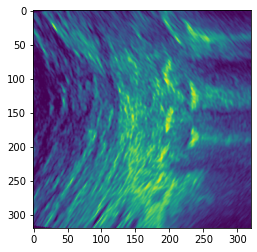

In [7]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

plt.imshow(slc_img[0])

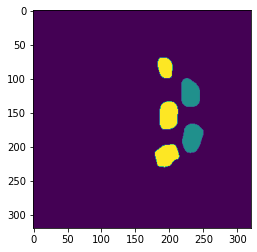

In [8]:
plt.imshow(slc_nnet)

In [9]:
croproi, croplbl = roi_nnet.generate_roi(slc_img, slc_array, slc_nnet)
croproiIdeal, croplblIdeal = roi_nnet.generate_roi(slc_img, slc_array, slc_ideal)

(320, 320)
320
320
itkSize3 ([320, 320, 32])
169 90 0
297 218 32
(320, 320)
320
320
itkSize3 ([320, 320, 32])
158 90 0
286 218 32
(320, 320) (320, 320)
0 2
0 2
tensor(0., dtype=torch.float64) tensor(2., dtype=torch.float64)
tensor(0., dtype=torch.float64) tensor(2., dtype=torch.float64)


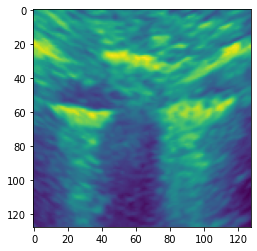

In [10]:
plt.imshow(rotate(croproi[0,0,0],270))

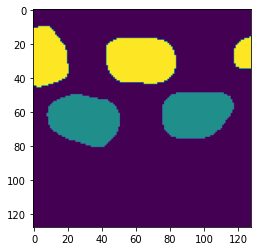

In [11]:
plt.imshow(rotate(croplbl[0,0],270))

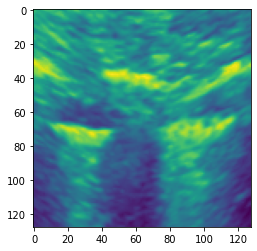

In [12]:
plt.imshow(rotate(croproiIdeal[0,0,0],270))

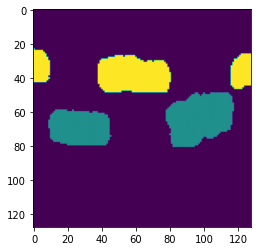

In [13]:
plt.imshow(rotate(croplblIdeal[0,0],270))